# 16 Core Machine Results

In [1]:
import seaborn as sns
import pandas as pd
import numpy as npba

In [2]:
metrics = pd.read_csv('../../data/exp1/log/training_metrics.csv')
metrics['batch_size'] = 12
metrics.head()

,Unnamed: 0,architecture,num_epochs,num_processes,threads,is_distributed,training_time,accuracy,avg_loss,batch_size
0,0,conv,2,1,16,n,149.204619,89.520000,0.355462,12
1,1,ff,2,1,8,n,42.153393,39.690000,2.091450,12
2,2,conv,2,2,12,y,95.755098,90.283333,0.328097,12
3,3,conv,2,2,13,y,103.028658,90.886667,0.310399,12
4,4,conv,2,1,13,n,157.889911,90.683333,0.313261,12


## Training Time - 2 Processes vs 1 Process

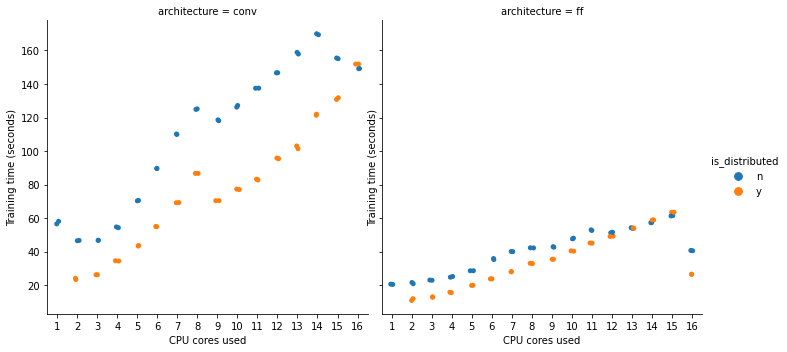

In [4]:
sns.catplot(x='threads', y='training_time', hue='is_distributed', kind='strip', col='architecture', data=metrics, ).set(xlabel='CPU cores used', ylabel='Training time (seconds)').savefig('line_chart_dist_vs_seq.png')

## Accuracy - Architecture Comparison

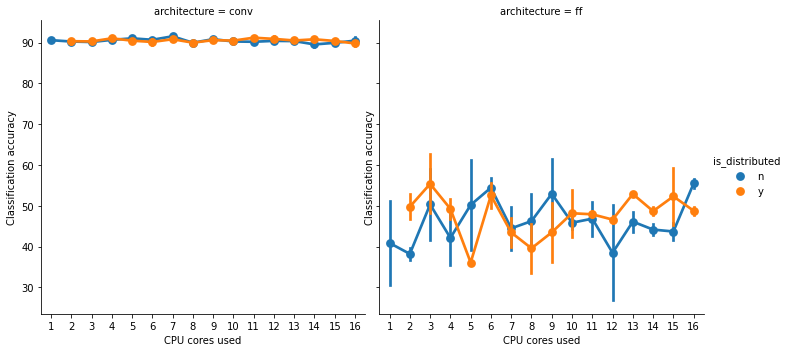

In [5]:
sns.catplot(x='threads', y='accuracy', hue='is_distributed', kind='point', col='architecture', data=metrics).set(xlabel='CPU cores used', ylabel='Classification accuracy').savefig('line_chart_accuracy_comparison_arch.png')

# Experiment 2 - Effect of batch size and number of processes
- Generate distributed results using 2, 3 and 4 processes on 16 core machine.
- 32, 64, 128, and 256 mini-batch size on CNN, distributed processing.

In [3]:
metrics2 = pd.read_csv('../../data/exp2/training_metrics2.csv')
metrics2.head()

,Unnamed: 0,architecture,num_epochs,num_processes,threads,is_distributed,training_time,accuracy,avg_loss,batch_size
0,0,conv,2,2,13,y,16.885422,31.803333,2.265673,128
1,1,conv,2,4,11,y,25.782217,65.496667,1.975904,64
2,2,conv,2,4,13,y,14.637748,19.920000,2.256005,256
3,3,conv,2,2,9,y,20.966566,53.200000,2.199093,64
4,4,conv,2,4,9,y,34.783108,67.606667,2.028871,32


In [4]:
# select all conv metrics from experiment 1
metrics_conv = metrics[(metrics['architecture'] == 'conv') & (metrics['is_distributed'] == 'y')]

In [5]:
# total conv model dataset
total_conv_metrics = metrics_conv.append(metrics2)
total_conv_metrics

,Unnamed: 0,architecture,num_epochs,num_processes,threads,is_distributed,training_time,accuracy,avg_loss,batch_size
2,2,conv,2,2,12,y,95.755098,90.283333,0.328097,12
3,3,conv,2,2,13,y,103.028658,90.886667,0.310399,12
9,9,conv,2,2,11,y,82.742661,91.668333,0.282081,12
13,13,conv,2,2,8,y,86.652790,90.065000,0.333053,12
15,15,conv,2,2,3,y,26.183858,90.410000,0.320142,12
...,...,...,...,...,...,...,...,...,...,...
415,415,conv,2,4,6,y,8.508883,11.878333,2.273793,256
416,416,conv,2,2,10,y,12.984534,12.563333,2.278739,256
417,417,conv,2,2,16,y,41.116353,61.641667,1.971515,64
418,418,conv,2,3,14,y,19.712026,51.510000,2.139743,128


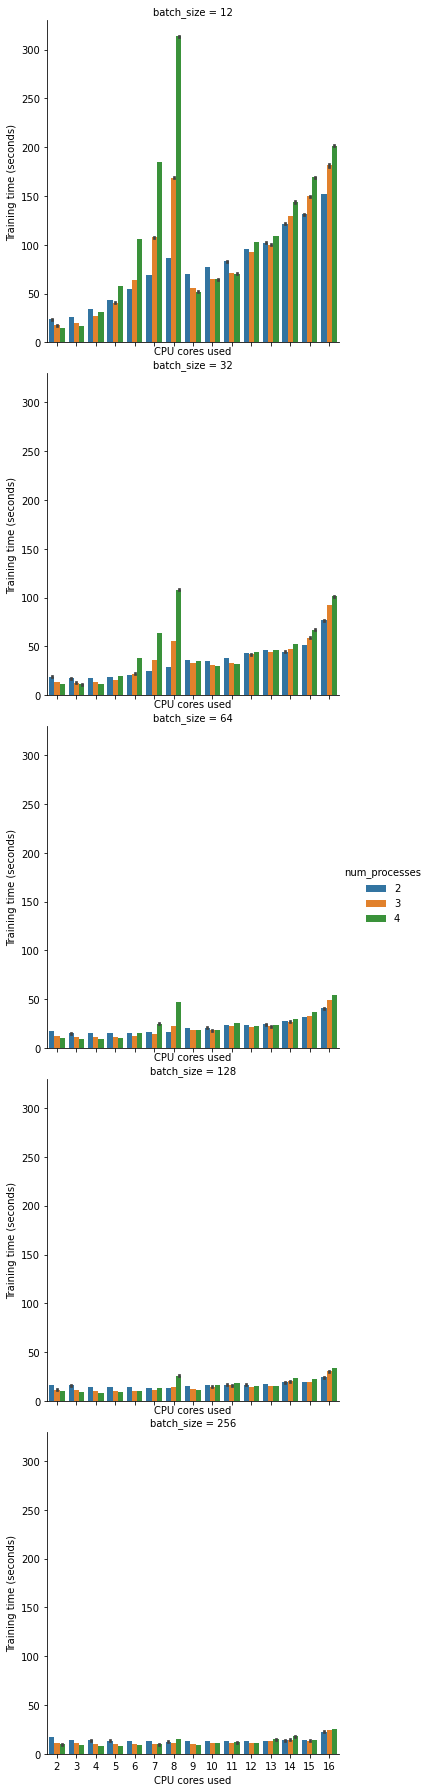

In [26]:
sns.catplot(x='threads', y='training_time', hue='num_processes', kind='bar', row='batch_size', data=total_conv_metrics).set(xlabel="CPU cores used", ylabel='Training time (seconds)').savefig('batch_size_procs_comp.png')

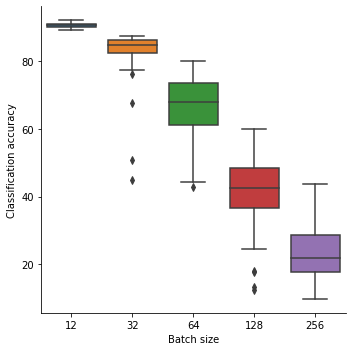

In [34]:
sns.catplot(x='batch_size', y='accuracy', kind='box', data=total_conv_metrics).set(xlabel="Batch size", ylabel="Classification accuracy").savefig('batch_acc.png')

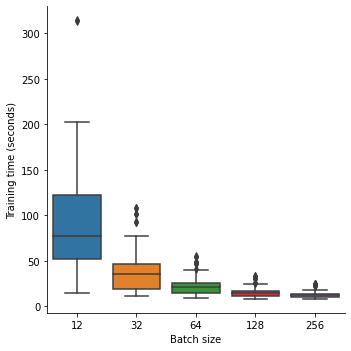

In [35]:
sns.catplot(x='batch_size', y='training_time', kind='box', data=total_conv_metrics).set(xlabel="Batch size", ylabel="Training time (seconds)").savefig('batch_time.png')

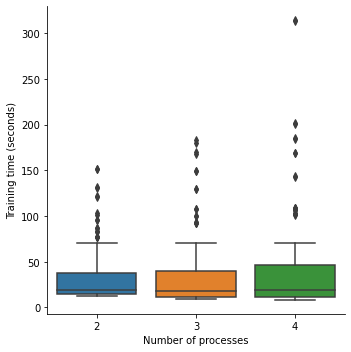

In [36]:
sns.catplot(x='num_processes', y='training_time', kind='box', data=total_conv_metrics).set(xlabel="Number of processes", ylabel="Training time (seconds)").savefig('procs_traintime.png')

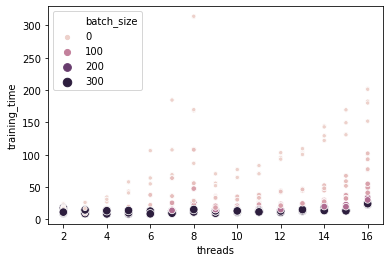

In [12]:
sns.scatterplot(x='threads', y='training_time', hue="batch_size", size="batch_size", data=total_conv_metrics)

# Statistics

In [6]:
# total conv model dataset
total_metrics = metrics.append(metrics2)
total_metrics

,Unnamed: 0,architecture,num_epochs,num_processes,threads,is_distributed,training_time,accuracy,avg_loss,batch_size
0,0,conv,2,1,16,n,149.204619,89.520000,0.355462,12
1,1,ff,2,1,8,n,42.153393,39.690000,2.091450,12
2,2,conv,2,2,12,y,95.755098,90.283333,0.328097,12
3,3,conv,2,2,13,y,103.028658,90.886667,0.310399,12
4,4,conv,2,1,13,n,157.889911,90.683333,0.313261,12
...,...,...,...,...,...,...,...,...,...,...
415,415,conv,2,4,6,y,8.508883,11.878333,2.273793,256
416,416,conv,2,2,10,y,12.984534,12.563333,2.278739,256
417,417,conv,2,2,16,y,41.116353,61.641667,1.971515,64
418,418,conv,2,3,14,y,19.712026,51.510000,2.139743,128


In [39]:
non_dist = total_metrics[(total_metrics.is_distributed == 'n') & (total_metrics.threads==1) & (total_metrics.batch_size == 12) & (total_metrics.num_processes==1)].groupby(['architecture']).mean().accuracy
non_dist

dist = total_metrics[(total_metrics.is_distributed == 'y') & (total_metrics.num_processes == 2) & (total_metrics.batch_size == 12) & (total_metrics.threads==2)].groupby(['architecture']).mean().accuracy
dist

train_diff = non_dist - dist
train_diff

perc_diff = (train_diff / non_dist) * 100

perc_diff

architecture
conv     0.283270
ff     -21.757484
Name: accuracy, dtype: float64

In [40]:
non_dist = total_metrics[(total_metrics.is_distributed == 'n') & (total_metrics.threads==1) & (total_metrics.batch_size == 12) & (total_metrics.num_processes==1)].groupby(['architecture']).mean().training_time
non_dist

dist = total_metrics[(total_metrics.is_distributed == 'y') & (total_metrics.num_processes == 2) & (total_metrics.batch_size == 12) & (total_metrics.threads==2)].groupby(['architecture']).mean().training_time
dist

train_diff = non_dist - dist
train_diff

perc_diff = (train_diff / non_dist) * 100

perc_diff

architecture
conv    58.652952
ff      44.564146
Name: training_time, dtype: float64

In [8]:
total_metrics[['training_time','accuracy']].describe()

,training_time,accuracy
count,544.000000,544.000000
mean,40.607184,61.201081
std,42.824144,25.475679
min,8.350045,9.831667
25%,13.959138,41.055833
50%,22.974766,62.800833
75%,49.057287,86.395833
max,314.137526,92.185000


In [41]:
def get_metrics_table(feature, value):
    metrics = total_metrics.groupby([feature])[[value]].describe()
    metrics = metrics[[(value, 'mean'),(value, 'std'),(value, 'min'),(value, 'max')]]
    return metrics

In [53]:
# Training Time Metrics
num_proc_metrics = get_metrics_table('num_processes','training_time')
dnn_metrics = get_metrics_table('architecture','training_time')
batch_metrics = get_metrics_table('batch_size','training_time')

# Accuracy Score Metrics
num_proc_metrics_acc = get_metrics_table('num_processes','accuracy')
dnn_metrics_acc = get_metrics_table('architecture','accuracy')
batch_metrics_acc = get_metrics_table('batch_size','accuracy')

In [54]:
with open('table.tex', 'w') as f:
    f.write(num_proc_metrics.to_latex())
    f.write(dnn_metrics.to_latex())
    f.write(batch_metrics.to_latex())
    f.write(num_proc_metrics_acc.to_latex())
    f.write(dnn_metrics_acc.to_latex())
    f.write(batch_metrics_acc.to_latex())